# Chapter II 

## Plotting time-series

### Time-Series data

Many kinds of data are organized as time-series, and visualizations of time-series are an excellent tool to detect patterns in the data. In this chapter, we'll dive deeper into using Matplotlib to visualize time-series data.

### Climate change time-series

Let's look at a more complex dataset, that contains records of the change in climate in the last half a century or so. The data is in a CSV file with three columns. 

* The **"date"** column indicates when the recording was made and is stored in the year-month-date format. A measurement was taken on the 6th day of every month from 1958 until 2016.

* The column **"co2"** contains measurements of the carbon dioxide in the atmosphere. The number shown in each row is parts-per-million of carbon dioxide. 

* The column **"relative-underscore-temp"** denotes the temperature measured at this date, relative to a baseline which is the average temperature in the first ten years of measurements. 

If we want pandas to recognize that this is a time-series, we'll need to tell it to **parse** the "date" column as a date. To use the full power of pandas indexing facilities, we'll also designate the **date column as our index** by using the **index_col** key-word argument.

In [6]:
# Climate change time-series
import pandas as pd
climate_change = pd.read_csv('datasets\\climate_change.csv',
                             index_col='date', parse_dates=True)

climate_change.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


### Plotting time-series data

To start plotting the data, we import Matplotlib and create a **Figure and Axes**. 

Next, we add the data to the plot. We add the index of our DataFrame for the x-axis and the "co2" column for the y-axis. 

We also label the x- and y-axes. Matplotlib automatically chooses to show the time on the x-axis as years, with intervals of 10 years.

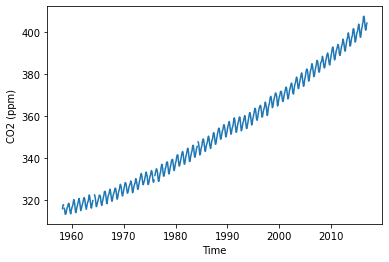

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(climate_change.index, climate_change['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')
plt.show()

#### Zooming in on a decade and one year

We can select a decade of the data by slicing into the DataFrame with two strings that delimit the start date and end date of the period that we are interested in.

When we do that, we get the plot of a part of the time-series encompassing only ten years worth of data. Matplotlib also now knows to label the x-axis ticks with years, with an interval of one year between ticks. 

Zooming in even more, we can select the data from one year. Now the x-axis automatically denotes the months within that year.

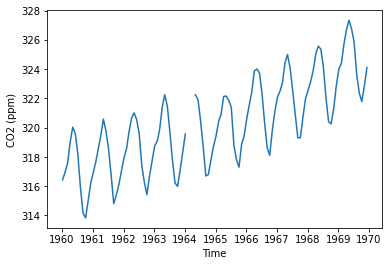

In [8]:
# Zooming in on a decade
sixties = climate_change["1960-01-01":"1969-12-31"]

fig, ax = plt.subplots()
ax.plot(sixties.index, sixties['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')
plt.show()

'''
Looking at this data, you'll also notice that the missing values in this time series are 
represented as breaks in the line plotted by Matplotlib.
'''

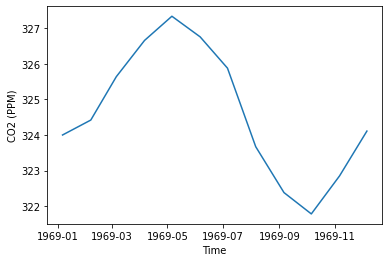

In [9]:
# Zooming in on one year
sixty_nine = climate_change["1969-01-01":"1969-12-31"]

fig, ax = plt.subplots()
ax.plot(sixty_nine.index, sixty_nine['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (PPM)')
plt.show()

## Plotting time-series with different variables

To relate two time-series that coincide in terms of their times, but record the values of different variables, we might want to plot them on the same Axes.

For example, consider the climate-underscore-change DataFrame that we've seen previously. This DataFrame contains two variables measured every month from 1958 until 2016: levels of carbon dioxide and relative temperatures.

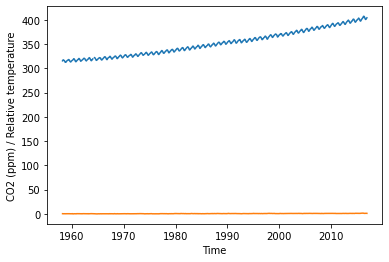

In [10]:
# Plotting two time-series together

fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change['co2'])
ax.plot(climate_change.index, climate_change['relative_temp'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm) / Relative temperature')
plt.show()

As before, we can create a Figure and Axes and add the data from one variable to the plot. And we can add the data from the other variable to the plot. We also add axis labels and show the plot. But this doesn't look right. The line for carbon dioxide has shifted upwards, and the line for relative temperatures looks completely flat. The problem is that the scales for these two measurements are different.

### Using twin axes

You've already seen how you could plot these time-series in separate sub-plots. Here, we're going to plot them in the same sub-plot, using two different y-axis scales. 

Again, we start by adding the first variable to our Axes. 

Then, we use the twinx method to create a twin of this Axes. This means that the two Axes share the same x-axis, but the y-axes are separate. 

We add the other variable to this second Axes object and show the figure. There is one y-axis scale on the left, for the carbon dioxide variable, and another y-axis scale to the right for the temperature variable. Now you can see the fluctuations in temperature more clearly.

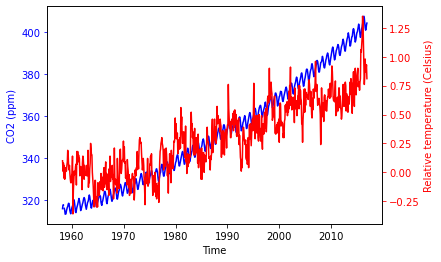

In [13]:
fig, ax = plt.subplots()

# 1st Step adding first variable to our axes
# Adding Coloring to distinguish
ax.plot(climate_change.index, climate_change['co2'], color='blue')
ax.set_xlabel('Time')
# Also adding Color to the y label
ax.set_ylabel('CO2 (ppm)', color='blue')
# Coloring the ticks with tick_params method
ax.tick_params('y', colors='blue')
# We use the twinx method to create a twin of this axes
ax2 = ax.twinx()
ax2.plot(climate_change.index, climate_change['relative_temp'], color='red')
ax2.set_ylabel('Relative temperature (Celsius)', color='red')
ax2.tick_params('y', colors='red')
# Show the plot
plt.show()

### Function that plots time-series

We use the **def** keyword to indicate that we are defining a function called **plot_timeseries()**.

This function takes as arguments an **Axes object, x and y variables to plot, a color to associate with this variable, as well as x-axis and y-axis labels.** 

The function calls the methods of the Axes object that we have seen before: **plot, set_xlabel, set_ylabel, and tick_params**.

```python
def plot_timeseries(axes, x, y, color, xlabel, y label):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.tick_params('y', colors=color)
```

In [15]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.tick_params('y', colors=color)

## Annotating time-series data

One important way to enhance a visualization is to add annotations. Annotations are usually small pieces of text that refer to a particular part of the visualization, focusing our attention on some feature of the data and explaining this feature.

For example, consider the data that we saw in previous videos in this chapter. This data shows the levels of measured carbon dioxide in the atmosphere over a period of more than 50 years in blue and the relative temperature over the same period of time in red. That's a lot of data, and, when presenting it, you might want to focus attention on a particular aspect of this data.

One way to draw attention to part of a plot is by annotating it. This means drawing an arrow that points to part of the plot and being able to include text to explain it. For example, let's say that we noticed that the first date in which the relative temperature exceeded 1 degree Celsius was October 6th, 2015. We'd like to point this out in the plot.

At the very least, this function takes the annotation text as input, in this case, the string **">1 degree"**, and the **xy coordinate** that we would like to annotate. 

Here, the value to annotate has the x position of the **TimeStamp** of that date. We use the pandas time-stamp object to define that. The y position of the data is 1, which is the 1 degree Celsius value at that date.

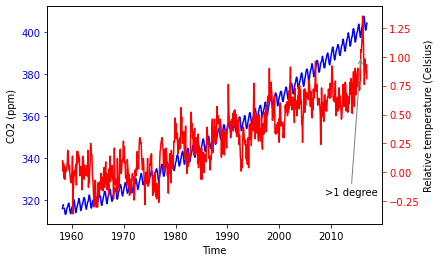

In [20]:
fig, ax = plt.subplots()

plot_timeseries(ax, climate_change.index, 
                climate_change['co2'], 
                'blue', 'Time', 'CO2 (ppm)')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index, 
                climate_change['relative_temp'], 
                'red', 'Time', 'Relative temperature (Celsius)')
## ANNOTATION !!!
# Positioning the text ==> xytext(pd.Timestamp('2008-10-06'), -0.2)
# Adding arrows to annotation ==> arrowporps = {} // Default
# Customizing arrow properties ==> arrowprops={"arrowstyle":"->", "color":"gray"}
ax2.annotate(">1 degree", xy=(pd.Timestamp("2015-10-06"), 1),
             xytext=(pd.Timestamp("2008-10-06"), -0.2),
             arrowprops={"arrowstyle":"->", "color":"gray"})
            
# Show the plot
plt.show()

There are many more options for customizing the arrow properties and other properties of the annotation, which you can read about in the Matplotlib documentation [here](https://matplotlib.org/2.0.2/users/annotations.html)